# Washington State Salaries

an exploration of public data

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from scipy.stats import gaussian_kde

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

ftype = '.pdf'

In [3]:
data = 'AnnualEmployeeSalary2013thru2017.csv'

df = pd.read_csv(data)
df.columns

Index(['Agy', 'AgyTitle', 'Name', 'JobTitle', 'Sal2013', 'Sal2014', 'Sal2015',
       'Sal2016', 'Sal2017'],
      dtype='object')

## Part 1: Comparing MY job

How much do my peers make?

In [4]:
sum(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER 3'))

746

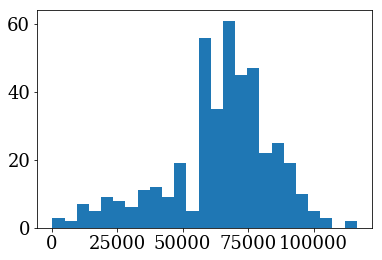

In [5]:
_ = plt.hist(df['Sal2017'][(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER 3')) & (df['Sal2017'] > 0)], 
             bins=25)

In [6]:
# limits of salary:
# https://hr.uw.edu/professional-staff-program/#appendix-professional-staff-salaries
# Research Scientist 3 = Grade 8

In [7]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


Text(0.5, 0, '2017 Salary ($k)')

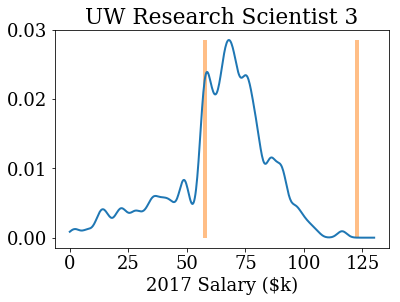

In [30]:
thisdata = df['Sal2017'][(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER 3')) & (df['Sal2017'] > 0)] / 1e3

kde = kde_scipy(thisdata, np.linspace(0,130,500), bandwidth=2)

plt.plot(np.linspace(0,130,500),kde, lw=2, label='2017 Data')
plt.vlines([57.900, 122.604], ymin=kde.min(), ymax=kde.max(), color='C1', lw=4, alpha=0.5, label='Grade Rage')

plt.title('UW Research Scientist 3')
plt.xlabel('2017 Salary ($k)')

In [31]:
# df[['Sal2017','Name']][(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER 3')) & (df['Sal2017'] > 0)]

Text(0.5, 0, '2017 Salary ($k)')

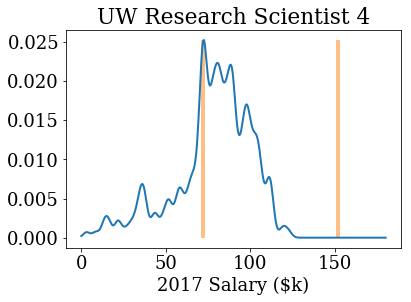

In [33]:
thisdata = df['Sal2017'][(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER 4')) & (df['Sal2017'] > 0)] / 1e3

kde = kde_scipy(thisdata, np.linspace(0,180,500), bandwidth=2)

plt.plot(np.linspace(0,180,500),kde, lw=2, label='2017 Data')
plt.vlines([71.736, 151.920], ymin=kde.min(), ymax=kde.max(), color='C1', lw=4, alpha=0.5, label='Grade Rage')

plt.title('UW Research Scientist 4')
plt.xlabel('2017 Salary ($k)')


In [34]:
caps = [[40.680, 86.160],  # Grade 6
        [49.584, 105.012], # 7
        [57.900, 122.604], # 8
        [71.736, 151.920]] # 9

titles = ['RESEARCH SCIENTIST/ENGINEER 1',
          'RESEARCH SCIENTIST/ENGINEER 2',
          'RESEARCH SCIENTIST/ENGINEER 3',
          'RESEARCH SCIENTIST/ENGINEER 4']

246 39.45 63.42 -0.6076045627376425
403 53.9 77.298 -0.434100185528757
426 67.2 90.252 -0.34303571428571417
289 80.9 111.828 -0.38229913473423976


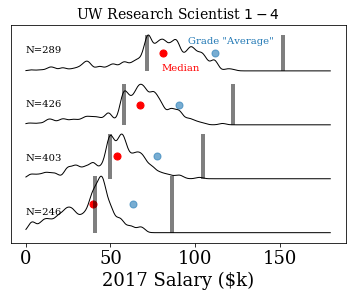

In [110]:
yoff =0.038

glabels=['1','2','3','4']

for k in range(len(titles)):
    thisdata = df['Sal2017'][(df['JobTitle'].str.contains(titles[k])) & (df['Sal2017'] > 0)] / 1e3

    kde = kde_scipy(thisdata, np.linspace(0,180,500), bandwidth=2)

    plt.plot(np.linspace(0,180,500), kde + yoff*k, lw=1, c='k')
    
    plt.vlines(caps[k], ymin=kde.min()+ yoff*k, ymax=kde.max() +yoff*k, 
               color='k', lw=4, alpha=0.5)

    plt.scatter(thisdata.median(), (kde.max()+kde.min())/2.+yoff*k, color='r',s=50)
    plt.scatter(np.mean(caps[k]), (kde.max()+kde.min())/2.+yoff*k, color='C0',s=50, alpha=0.6)
    
    print(np.size(thisdata), thisdata.median(), np.mean(caps[k]), 
          (thisdata.median() - np.mean(caps[k]))/thisdata.median())
    
#     plt.text(170, yoff*k+ yoff/7, glabels[k], fontsize=12)
    plt.text(0, yoff*k+yoff/3, 'N='+str(np.size(thisdata)), fontsize=10)
    
plt.title('UW Research Scientist $1-4$', fontsize=14)
plt.xlabel('2017 Salary ($k)')

plt.text(80,yoff*3, 'Median', color='r', fontsize=10)
plt.text(96,yoff*3+yoff/2, 'Grade "Average"', color='C0', fontsize=10)
plt.gca().axes.get_yaxis().set_visible(False)

plt.savefig('salary.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

(20, 300)

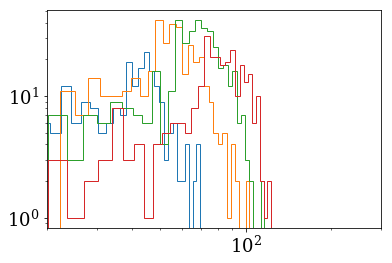

In [106]:

for k in range(len(titles)):
    thisdata = df['Sal2017'][(df['JobTitle'].str.contains(titles[k])) & (df['Sal2017'] > 0)] / 1e3

#     kde = kde_scipy(thisdata, np.linspace(0,180,500), bandwidth=2)
    _ =plt.hist(thisdata,bins=35, histtype='step')
#     plt.plot(np.linspace(0,180,500), kde, lw=1, c='k')
    
#     plt.vlines(caps[k], ymin=kde.min(), ymax=kde.max(), 
#                color='k', lw=4, alpha=0.5)

plt.xscale('log')    
plt.yscale('log')    
plt.xlim(20,300)
    

### One more thing...

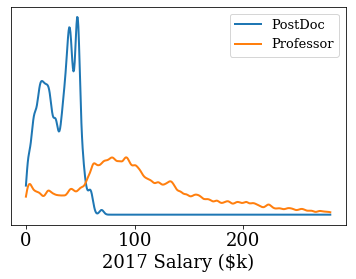

In [95]:
thisdata = df['Sal2017'][(df['JobTitle'].str.contains('POSTDOC')) & (df['Sal2017'] > 0)] / 1e3
kde = kde_scipy(thisdata, np.linspace(0,280,500), bandwidth=2)
plt.plot(np.linspace(0,280,500), kde, lw=2, label='PostDoc')
 
thisdata = df['Sal2017'][(df['JobTitle'].str.contains('PROFESSOR')) & (df['Sal2017'] > 0)] / 1e3
kde = kde_scipy(thisdata, np.linspace(0,280,500), bandwidth=2)
plt.plot(np.linspace(0,280,500), kde, lw=2, label='Professor')

plt.legend(fontsize=13)
plt.xlabel('2017 Salary ($k)')
plt.gca().axes.get_yaxis().set_visible(False)


plt.savefig('postdoc_prof.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

## Part 2: Comparing Universities

In [112]:
df.columns

Index(['Agy', 'AgyTitle', 'Name', 'JobTitle', 'Sal2013', 'Sal2014', 'Sal2015',
       'Sal2016', 'Sal2017'],
      dtype='object')

In [163]:
# thisdata = df['Sal2017'][(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER 4')) & (df['Sal2017'] > 0)] / 1e3

uni = df['AgyTitle'][df['AgyTitle'].str.contains('University')].unique()
clrs = ['#4b2e83', '#981e32', '#AB0032', '#33659F', '#a10022']
print(uni)

['University of Washington                                         '
 'Washington State University                                      '
 'Central Washington University                                    '
 'Western Washington University                                    '
 'Eastern Washington University                                    ']


In [153]:
# df['AgyTitle'][df['AgyTitle'].str.contains('College')].unique()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


University of Washington                                          4829 122.1
Washington State University                                       1677 78.7
Central Washington University                                     456 74.25
Western Washington University                                     597 80.4
Eastern Washington University                                     362 83.55


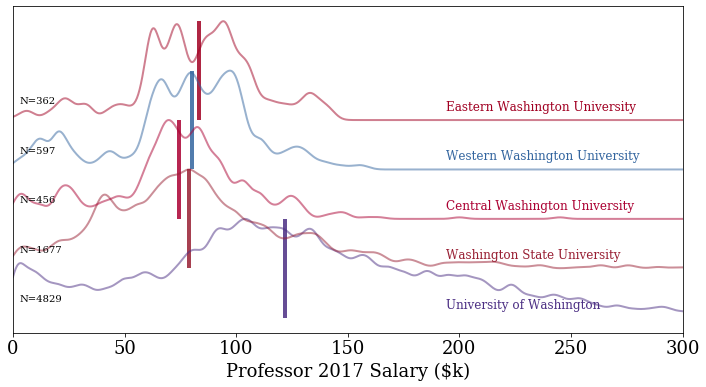

In [179]:
plt.figure(figsize=(12,6))

yoff = 0.5
for k in range(np.size(uni)):
    thisuni = [(df['AgyTitle'].values == uni[k]) & 
               (df['JobTitle'].str.contains('PROFESSOR')) & 
               (df['Sal2017'] > 0)]
    thisdata = df['Sal2017'].values[thisuni] / 1e3

#     _ = plt.hist(thisdata, label=uni[k].strip(), normed=False,
#                  lw=3, bins=np.linspace(0,300,35), histtype='step')
    
    print(uni[k], np.size(thisdata), np.median(thisdata))
    kde = kde_scipy(thisdata, np.linspace(0,300,1000), bandwidth=3)

    plt.plot(np.linspace(0,300,1000), kde/kde.max() +k*yoff, 
             lw=2, c=clrs[k], label=uni[k].strip(), alpha=0.5)
    
    plt.vlines(np.median(thisdata), ymin=0 +k*yoff, ymax=1+k*yoff,
               color=clrs[k], lw=4, alpha=0.85)

    plt.text(194, k*yoff+yoff/5, uni[k].strip(), color=clrs[k], fontsize=12)
    plt.text(3, yoff*k+yoff/3, 'N='+str(np.size(thisdata)), fontsize=10)
    

plt.xlim(0,300)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('Professor 2017 Salary ($k)')
plt.savefig('univ_salary.png', dpi=350, bbox_inches='tight', pad_inches=0.25)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


University of Washington                                          4829 0.1602782882646364
Washington State University                                       1677 0.2919139465875371
Central Washington University                                     456 0.2879022877084141
Western Washington University                                     597 0.20094976255936017
Eastern Washington University                                     362 0.3553806890684815


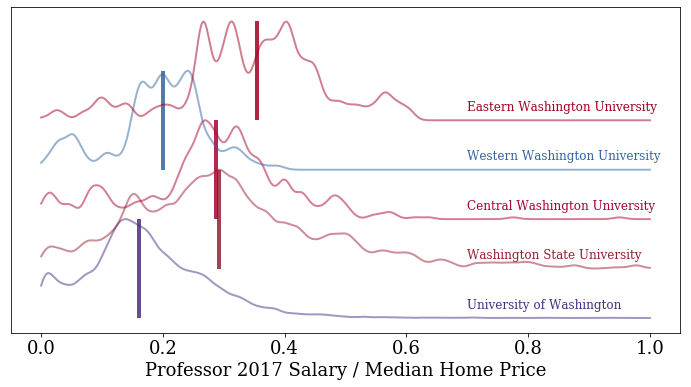

In [193]:
# According to Google, this is the median family home price in each Univ's city
# Note of course, many faculty now don't (can't) live within Seattle city limits...

homes = [761800, 269600, 257900, 400100, 235100]

plt.figure(figsize=(12,6))

yoff = 0.5
for k in range(np.size(uni)):
    thisuni = [(df['AgyTitle'].values == uni[k]) & 
               (df['JobTitle'].str.contains('PROFESSOR')) & 
               (df['Sal2017'] > 0)]
    thisdata = df['Sal2017'].values[thisuni] / homes[k]

    print(uni[k], np.size(thisdata), np.median(thisdata))
    xx = np.linspace(0,1,1000)
    kde = kde_scipy(thisdata, xx, bandwidth=xx.max()/100)

    plt.plot(xx, kde/kde.max() +k*yoff, 
             lw=2, c=clrs[k], label=uni[k].strip(), alpha=0.5)
    
    plt.vlines(np.median(thisdata), ymin=0 +k*yoff, ymax=1+k*yoff,
               color=clrs[k], lw=4, alpha=0.85)
    plt.text(.7, k*yoff+yoff/5, uni[k].strip(), color=clrs[k], fontsize=12)


plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('Professor 2017 Salary / Median Home Price')
plt.savefig('univ_cost.png', dpi=350, bbox_inches='tight', pad_inches=0.25)

In [194]:
df.shape

(432043, 9)

In [196]:
df['Name'].unique().shape

(244781,)